

# Boosting
### General idea:

the idea of boosting methods is to combine several weak learners to former a strong one.

**Adaptative boosting:**

- High weights are put on errors to improve at the next boosting step;

- Known as Adaboost


**Gradient boosting:**

- Weak learners are trained on residuals;

- Examples include XGBoost.



Ref: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning

# EXAMPLES

## XBGoost

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import model_selection, metrics, preprocessing

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# Fitting

classifier = GradientBoostingClassifier( random_state = 0)
classifier.fit(X_train, Y_train)

#prediction

Y_pred = classifier.predict(X_test)

#confusion matrix

cm = confusion_matrix(Y_test, Y_pred)

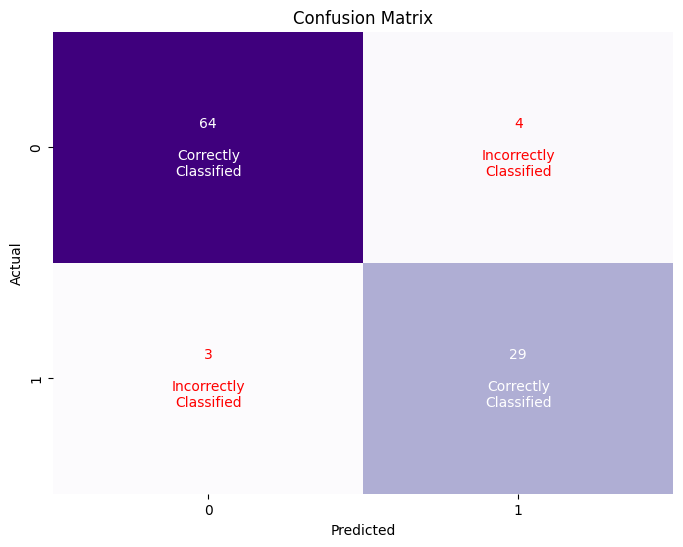

In [16]:
# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Purples", cbar=False)

# Adding labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adding TP, TN, FP, FN labels
for i in range(len(cm)):
    for j in range(len(cm)):
        text = f"{cm[i, j]}"
        if i == j:
            text += f"\n\nCorrectly\nClassified"
        else:
            text += f"\n\nIncorrectly\nClassified"
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='red' if i != j else 'white')

plt.show()

<ipython-input-21-2c7ccbe3ecec>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


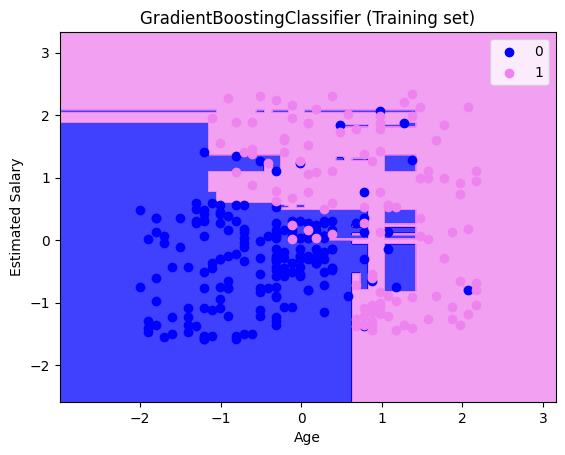

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'violet')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'violet'))(i), label = j)
plt.title('GradientBoostingClassifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-23-ddeef1eea8ee>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


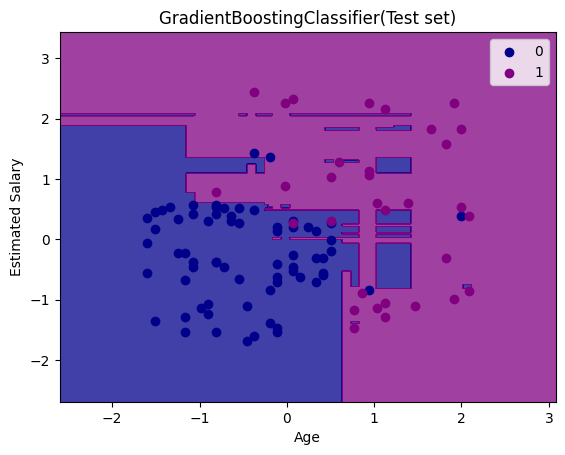

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkblue', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkblue', 'purple'))(i), label = j)
plt.title('GradientBoostingClassifier(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## XGBoost

In [31]:
#
def fit_ml_algo(algo, X_train, y_train, X_test, y_test, cv):
    model = algo.fit(X_train, y_train)
    test_prediction = model.predict(X_test)
    test_probs = model.predict_proba(X_test)[:,1]
    train_accuracy = model.score(X_train, y_train)*100
    test_accuracy = model.score(X_test, y_test)*100
    train_prediction = model_selection.cross_val_predict(algo, X_train, y_train, cv = 10, n_jobs = -1)
    acc_cv = metrics.accuracy_score(y_train, train_prediction)*100
    model_scores = model_selection.cross_val_score(LogisticRegression(), X_train, y_train, cv = 10, n_jobs = -1)

    print("Cross Validation accuracy: (%0.2f) %0.4f (+/- %0.4f)" % (acc_cv, model_scores.mean(), model_scores.std() * 2))
    print('Model Test Accuracy: %0.2f   Model Train Accuracy: %0.2f'%(test_accuracy, train_accuracy))
    print(metrics.classification_report(y_test, test_prediction))
    print("Confusion matrix")
    print(metrics.confusion_matrix(y_test,test_prediction))

    return train_prediction, test_prediction, test_probs


# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


# Adding gridsearch report creating code
def report(results, n_top = 5):
    for i in range(1, n_top +1 ):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [24]:
params = { 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]}
estimator = XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)
xg_grid = model_selection.GridSearchCV(estimator=estimator, param_grid=params, scoring = 'roc_auc', n_jobs = 10, cv = 10, verbose=True)

In [27]:
xg_grid.fit(X_train, Y_train)


Fitting 10 folds for each of 135 candidates, totalling 1350 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=10,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=True)

In [32]:
best_estimator = xg_grid.best_estimator_
report(xg_grid.cv_results_)


Model with rank: 1
Mean validation score: 0.947 (std: 0.043)
Parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 5, 'subsample': 1.0}

Model with rank: 2
Mean validation score: 0.946 (std: 0.046)
Parameters: {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'subsample': 1.0}

Model with rank: 3
Mean validation score: 0.946 (std: 0.043)
Parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 5, 'subsample': 0.8}

Model with rank: 4
Mean validation score: 0.946 (std: 0.040)
Parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 4, 'subsample': 1.0}

Model with rank: 5
Mean validation score: 0.944 (std: 0.043)
Parameters: {'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 4, 'subsample': 0.8}



In [36]:
train_prediction, test_prediction, test_probs = fit_ml_algo(best_estimator, X_train, Y_train, X_test, Y_test, cv = 10)


Cross Validation accuracy: (89.67) 0.8233 (+/- 0.1933)
Model Test Accuracy: 94.00   Model Train Accuracy: 92.33
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100

Confusion matrix
[[64  4]
 [ 2 30]]


## ROC Curve

The receiver operating curve, also noted ROC, is the plot of TPR versus FPR by varying the threshold.

- True positive rate TPR:

$$
TPR = \frac{TP}{TP + FN}
$$

Equivalent to Recall, sensitivity.

- False positive rate FPR:

$$
FPR = \frac{FP}{TN + FP}
$$

Equivalent 1-specificity.

## AUC

The area under the receiving operating curve, also noted AUC or AUROC, is the area below the ROC as shown in the figure.

- High AUC: Indicates a good ability of the model to distinguish between positive and negative instances.
- AUC = 0.5: Suggests that the model is no better than random guessing.
- AUC < 0.5: Indicates that the model's predictions are worse than random.


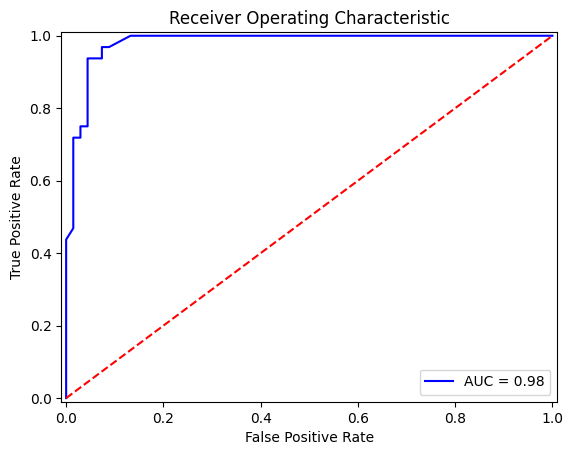

In [37]:
plot_roc_curve(Y_test, test_probs)


<ipython-input-38-abe75ae36eb2>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


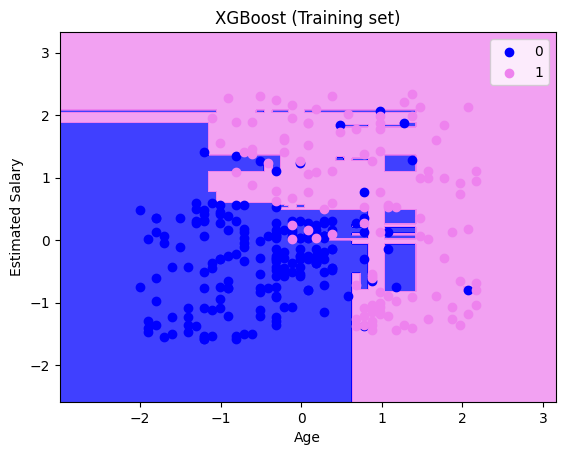

In [38]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'violet')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'violet'))(i), label = j)
plt.title('XGBoost (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-39-d6b2416cd3f8>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


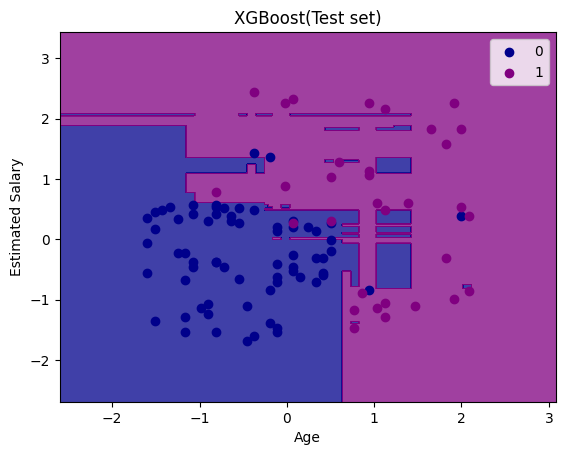

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkblue', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkblue', 'purple'))(i), label = j)
plt.title('XGBoost(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()